# Bar Chart (Grafik Çubuğu)

Bar chart belirli bir şeyin yada grubun sayısal değerinin diğerine göre karşılaştırılması için kullanılır. Grafikteki her çubuk ilgili şeyin büyüklüğünü gösterir. Bar chart yatay yada dikey olarak konumlandırılabilir. Bu nedenle pandas datasetinin grafiğini çizdirirken <code>kind</code> parametresi iki değer alabilir.

* Yatay grafik için <code>df.plot(kind="barh")</code>
* Dikey  grafik için <code>df.plot(kind="bar")</code>

şeklinde oluşturulabilir.

Örnekte kullandığımız veri setine ulaşmak için: 

https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp

In [1]:
import numpy as np
import pandas as pd

## Datanın oluşturulması

In [2]:
# Grafikte kullanacağımız datayı yükleyelim.
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
# Bize gerekli olmayan kolonları silelim
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
# Kolon isimlerini değiştirelim
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
# Kolon isimlerini string yapalım
df_can.columns = list(map(str, df_can.columns))
# Country kolonunu index yapalım
df_can.set_index('Country', inplace=True)
# Index adını silelim
df_can.index.name=None
# Göçmen sayısın toplamını gösteren Total isimli bir kolon ekleyelim
df_can['Total'] = df_can.sum(axis=1)
# Grafik çizerken kullanmak üzere years adınsa bir dizi oluşturalım
years = list(map(str, range(1980, 2014)))

## Grafiğin oluşturulması

In [3]:
%matplotlib inline

import matplotlib as mlp
import matplotlib.pyplot as plt

mlp.style.use("ggplot")

Bar chart uygulaması için inceleyeceğimiz veri İzlanda'dan Kanada'ya olan göçmen sayısındaki değişim olsun. Google üzerinden yapacağınız bir arama ile sizin de bulabileceğiniz gibi 2008 - 2011 arasında yaşanan büyük ekonomik kriz önemli bir ekonomik ve politik olaydı. Ekonomisinin büyüklüğüne göre, İzlanda'nın sistemik bankacılık çöküşü, ekonomi tarihinde herhangi bir ülkenin yaşadığı en büyük çöküştü. Kriz, 2008 - 2011 yıllarında ciddi bir ekonomik bunalım ve önemli siyasi huzursuzluklara yol açtı. Bu durumun Kanada'ya doğru olan göçmen sayısında değişikliğe yol açıp açamadığını inceleyeceğiz. 

In [4]:
# İzlanda verilerini asıl veri setimiz içerisinden alalım.
df_iceland=df_can.loc["Iceland",years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

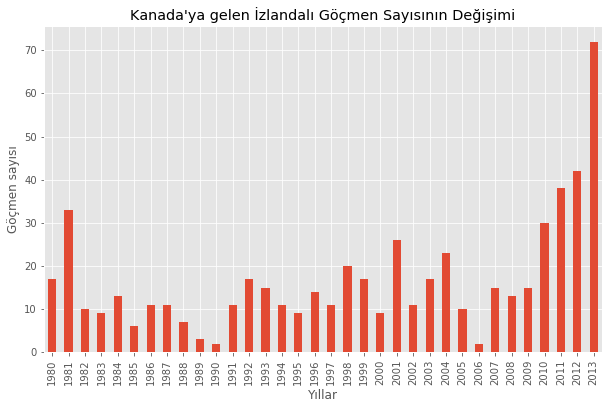

In [5]:
# Çektiğimiz verinin grafiğini çizdirelim
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Yıllar') 
plt.ylabel('Göçmen sayısı')
plt.title("Kanada'ya gelen İzlandalı Göçmen Sayısının Değişimi") 

plt.show()

Yukarıdaki grafiğe göre 2008'den başlamak üzere 2013 yılına artan bir trend ile İzlanda'dan ayrılıp Kanada'ya yerleşen insan sayısındaki artışı gösteriyor. 

Grafik üzerinde bu durumu bir not ekleyerek gösterebiliriz. Bunun için aşağıdaki parametreleri kullanabiliriz:
* <code>s</code>: Ek açıklama metni konulabilir.
* <code>xy</code>: Açıklama için (x,y) ile koordinatı belirten parametre. (Bizim örneğimizde okun son noktası)
* <code>xtext</code>: Açıklama metninin  (x,y) ile koordinatı ile konulacağı nokta. (Bizim örneğimizde okun başlangıç noktası)
* <code>xcoords</code>: Yukarıda bahse konu olan X ve Y'nin koordinat sistemi. Bunun default değeri 'data' ile çizimin koordinat sistemidir.
* <code>arrowprops</code>: Bir ok eklemek için aşağıdaki parametrelerin geçtiği bir dictionary ile tanımlanır.
    * <code>arrowstyle</code>: Ok'un tipini tanımlar.'->' default değeri budur.
    * <code>connectionstyle</code>: Okun ara çizgisini tanımlar, default değeri düz çizgi manasında 'arc3'
    * <code>color</code>: Okun rengini tanımlat.
    * <code>lw</code>: Okun çizgisinin genişliğini tanımlar.


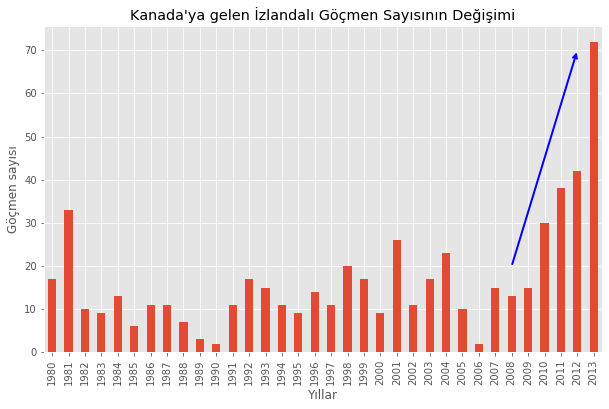

In [6]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # Çizgileri 90 derece döndürür.

plt.xlabel('Yıllar') 
plt.ylabel('Göçmen sayısı')
plt.title("Kanada'ya gelen İzlandalı Göçmen Sayısının Değişimi") 


# Ok ile trendi gösterme
plt.annotate('',                      # s: Bir sonraki örnekte dolduracağız.
             xy=(32, 70),             # Okun bitiş noktası (yıl 2012 , göçmen sayısı 70)
             xytext=(28, 20),         # Okun başlangıç noktası (yıl 2008 , göçmen sayısı 20)
             xycoords='data',         # Koordinat sistemini belirtiyoruz 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

Eklemiş olduğumuz okun üzerine kriz sebebi ile olduğuna dair bir açıklama ekleyelim. Bunun daha iyi görünmesi için aşağıdaki parametreleri kullanacağız:
- `rotation`: Metnin kaç derece döndüreceğimizi söyleriz. 
- `va`: Dikey olarak metnin nasıl hizalanacağını belirtir. [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
- `ha`: Yatay olarak metnin nasıl hizalanacağını belirtir. [‘center’ | ‘right’ | ‘left’]

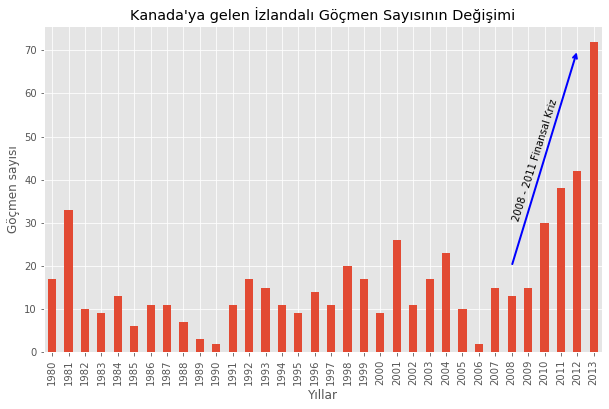

In [7]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # Çizgileri 90 derece döndürür.

plt.xlabel('Yıllar') 
plt.ylabel('Göçmen sayısı')
plt.title("Kanada'ya gelen İzlandalı Göçmen Sayısının Değişimi") 


# Ok ile trendi gösterme
plt.annotate('',                      # s: Bir sonraki örnekte dolduracağız.
             xy=(32, 70),             # Okun bitiş noktası (yıl 2012 , göçmen sayısı 70)
             xytext=(28, 20),         # Okun başlangıç noktası (yıl 2008 , göçmen sayısı 20)
             xycoords='data',         # Koordinat sistemini belirtiyoruz 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )


# Metin ekleme
plt.annotate('2008 - 2011 Finansal Kriz',    # gösterilecek metin
             xy=(28, 30),                    # metnin başlayacağı nokta (yıl 2008 , göçmen sayısı 30)
             rotation=72.5,                  # metnin kaç derecelik açı ile yerleştirileceğini
             va='bottom',                    # metnin dikey hizalanması
             ha='left',                      # metnin yatay hizalanması
            )

plt.show()